<a href="https://colab.research.google.com/github/Sapphirevic/Neural-Network/blob/main/Neural_network_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture of a neural network



<img src="https://github.com/Explore-AI/Public-Data/blob/master/Neural%20Networks/ANN_arc.png?raw=true" width="600px">



## The MNIST dataset

## Getting started

In [ ]:
! pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.utils import to_categorical

## Preparing the data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

print(x_train.shape)
print(y_train.shape)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)


In [4]:
# Normalize the images.
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## A look at some random digits


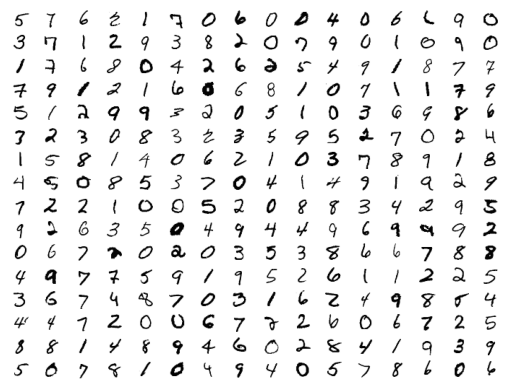

In [6]:
for i in range(256):
    ax = plt.subplot(16, 16, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Building the model

In [7]:
model = Sequential([
  # layers...

]),

In [8]:
model = Sequential([
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
]),

In [9]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model

In [10]:
# Compile model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Training and evaluating the model

In [11]:
print (tf.__version__)

2.18.0


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8152 - loss: 0.5962 - val_accuracy: 0.9467 - val_loss: 0.1825
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9411 - loss: 0.1955 - val_accuracy: 0.9595 - val_loss: 0.1421
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9532 - loss: 0.1501 - val_accuracy: 0.9657 - val_loss: 0.1162
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9619 - loss: 0.1193 - val_accuracy: 0.9665 - val_loss: 0.1194
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9659 - loss: 0.1066 - val_accuracy: 0.9668 - val_loss: 0.1126
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9701 - loss: 0.0948 - val_accuracy: 0.9695 - val_loss: 0.1050
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9741 - loss: 0.0800 - val_accuracy: 0.9677 - val_loss: 0.1090
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9779 - loss: 0.0707 - 

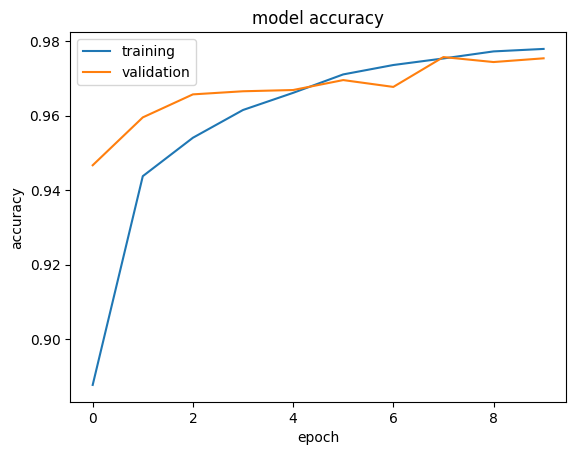

Test loss: 0.106
Test accuracy: 0.972


In [12]:
# Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=True, validation_split=0.1)

# Evaluating the model
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Not bad for a relatively simple model.

## Making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


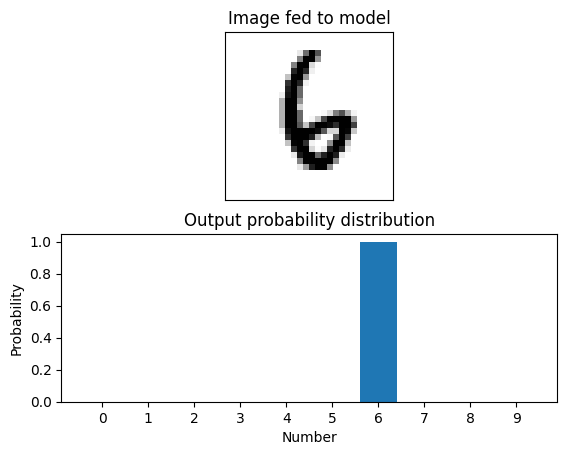

Top prediction: 6


In [18]:
# select an image at random to feed to our model
idx = np.random.randint(len(x_train))

prediction = model.predict(x_train[[idx]])[0]

fig, ax = plt.subplots(2, 1)

ax[0].imshow(x_train_drawing[idx], cmap='Greys')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Image fed to model')

ax[1].bar(range(0, 10), prediction)
ax[1].set_xticks(range(0, 10))
ax[1].set_xlabel('Number')
ax[1].set_ylabel('Probability')
ax[1].set_title('Output probability distribution')

plt.show()

print(f'Top prediction: {prediction.argmax()}')